Import the libraries we´ll need for this project

In [2]:
!pip install geocoder
!pip install pygeocoder
from pygeocoder import Geocoder
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests

/bin/bash: conda: command not found


In [16]:
import numpy as np
import pandas as pd

import json
from pandas.io.json import json_normalize

import seaborn as sns
from sklearn.cluster import KMeans
!pip install folium
import folium

In [6]:
import geocoder

Read the boroughs from the Wikipedia page and extract the right table into a dataframe. Afterwards, clean the columns with information we won´t need.

In [195]:
url = "https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin"
df = pd.read_html(url)
df = df[0]
df

,Borough,Population 31 March 2010,Area in km2,Density per km2,Map
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,NaN
1,Friedrichshain-Kreuzberg,268225,20.16,13187,NaN
2,Lichtenberg,259881,52.29,4952,NaN
3,Marzahn-Hellersdorf,248264,61.74,4046,NaN
4,Mitte,332919,39.47,8272,NaN
5,Neukölln,310283,44.93,6804,NaN
6,Pankow,366441,103.01,3476,NaN
7,Reinickendorf,240454,89.46,2712,NaN
8,Spandau,223962,91.91,2441,NaN
9,Steglitz-Zehlendorf,293989,102.50,2818,NaN


In [196]:
# boroughs = df.iloc[:, 0]

df.drop(axis = 1, inplace = True, columns = ["Area in km2", "Density per km2", "Map"])
df

,Borough,Population 31 March 2010
0,Charlottenburg-Wilmersdorf,319628
1,Friedrichshain-Kreuzberg,268225
2,Lichtenberg,259881
3,Marzahn-Hellersdorf,248264
4,Mitte,332919
5,Neukölln,310283
6,Pankow,366441
7,Reinickendorf,240454
8,Spandau,223962
9,Steglitz-Zehlendorf,293989


Create a new dataframe with longitude and latitude values. Those will be extracted by using the Geocoder package we´ve imported before.

In [197]:
district_numbers = list(range(0, 12))
district_numbers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [198]:
columns = ["Name", "Latitude", "Longitude"]
berlin = pd.DataFrame(columns = columns)

berlin

,Name,Latitude,Longitude


In [199]:
name = df["Borough"]
latitude = None
longitude = None
location = None

for n in range(0, len(name)):
  br = borough[n]
  name = df["Borough"][n]

  geolocator = Nominatim(user_agent = "my-application")
  location = geolocator.geocode("{}".format(name))
  latitude = location.latitude
  longitude = location.longitude

  berlin = berlin.append({'Name':name,
                                  'Latitude': location.latitude,
                                  'Longitude': location.longitude}, 
                                 ignore_index=True)

In [188]:
berlin

,Name,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,52.507856,13.263952
1,Friedrichshain-Kreuzberg,52.501115,13.444285
2,Lichtenberg,48.921296,7.481227
3,Marzahn-Hellersdorf,52.522523,13.587663
4,Mitte,52.517885,13.404060
5,Neukölln,52.481150,13.435350
6,Pankow,52.597917,13.435316
7,Reinickendorf,52.604763,13.295287
8,Spandau,52.535788,13.197792
9,Steglitz-Zehlendorf,52.429205,13.229974


In [201]:
berlin2 = berlin

In [206]:
# clean the data
berlin2.drop_duplicates
berlin2

,Name,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,52.507856,13.263952
1,Friedrichshain-Kreuzberg,52.501115,13.444285
2,Lichtenberg,48.921296,7.481227
3,Marzahn-Hellersdorf,52.522523,13.587663
4,Mitte,52.517885,13.404060
5,Neukölln,52.481150,13.435350
6,Pankow,52.597917,13.435316
7,Reinickendorf,52.604763,13.295287
8,Spandau,52.535788,13.197792
9,Steglitz-Zehlendorf,52.429205,13.229974


Use the folium package to visualize the boroughs in Berlin and also get the coordinates of Berlin´s central point

In [207]:
# using folium to map the boroughs
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode('Berlin')
latitude = location.latitude
longitude = location.longitude

print('The latitude and longitude of Berlin is: {}, {}.'.format(latitude, longitude))

The latitude and longitude of Berlin is: 52.5170365, 13.3888599.


In [212]:
berlin_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(berlin2['Latitude'], berlin2['Longitude'], berlin2['Name']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(berlin_map)  
    
berlin_map

Use the Foursquare API to explore the venues in all boroughs of Berlin

In [213]:
# using Foursquare to explore the venues of each borough

CLIENT_ID = 'J0FDUY5D0QRNGUPZNZ1QL1MCMULFEFXSPYAOLZZSPIIV5ZRR' # your Foursquare ID
CLIENT_SECRET = 'BX0ILZFCPM5SVZOXTNPLPGJ3PMFH0JINM1U3KCSXQHEKDNU5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

category = '4bf58dd8d48988d142941735' # category for food (includes all types of restaurants)
radius = 500
LIMIT = 100
searchq = "venues"


print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: J0FDUY5D0QRNGUPZNZ1QL1MCMULFEFXSPYAOLZZSPIIV5ZRR
CLIENT_SECRET:BX0ILZFCPM5SVZOXTNPLPGJ3PMFH0JINM1U3KCSXQHEKDNU5


In [214]:
ber_lat = berlin2.loc[0, "Latitude"]
ber_log = berlin2.loc[0, "Longitude"]
ber_bor = berlin2.loc[0, "Name"]


'Charlottenburg-Wilmersdorf'

In [215]:
berlin_latitude = 52.5170365
berlin_longitude = 13.3888599

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
  CLIENT_ID, 
  CLIENT_SECRET, 
  VERSION, 
  berlin_latitude, 
  berlin_longitude, 
  category,
  radius, 
  LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=J0FDUY5D0QRNGUPZNZ1QL1MCMULFEFXSPYAOLZZSPIIV5ZRR&client_secret=BX0ILZFCPM5SVZOXTNPLPGJ3PMFH0JINM1U3KCSXQHEKDNU5&v=20180605&ll=52.5170365,13.3888599&categoryId=4bf58dd8d48988d142941735&radius=15000&limit=500'

In [216]:
results = requests.get(url).json()
results.values();
print(results)

{'meta': {'code': 200, 'requestId': '600c723f3858e2550c845b6e'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Berlin', 'headerFullLocation': 'Berlin', 'headerLocationGranularity': 'city', 'query': 'asian', 'totalResults': 293, 'suggestedBounds': {'ne': {'lat': 52.65203663500014, 'lng': 13.610293633523707}, 'sw': {'lat': 52.38203636499987, 'lng': 13.167426166476293}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '542edf37498e412bc384b638', 'name': 'Akemi', 'location': {'address': 'Rykestr. 39', 'lat': 52.537619865261455, 'lng': 13.421439910844029, 'labeledLatLngs': [{'label': 'display', 'lat': 52.537619865261455, 'lng': 13.421439910844029}], 'distance': 3180, 'postalCode': '10405', 'cc': 'DE', 'city': 'Berlin', 'state': 'Be

In [217]:
# # function that extracts the category of the venue
def get_category_type(row):
     try:
         categories_list = row['categories']
     except:
         categories_list = row['venue.categories']
        
     if len(categories_list) == 0:
         return None
     else:
         return categories_list[0]['name']

In [221]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Akemi,542edf37498e412bc384b638,Asian Restaurant,52.537620,13.421440
1,Transit,4af472d5f964a5208cf221e3,Asian Restaurant,52.506010,13.465904
2,A-Petit,518b8a13498ec407156aa0ea,Asian Restaurant,52.535865,13.421645
3,Transit,4ae1976ef964a5205a8621e3,Thai Restaurant,52.528680,13.402255
4,Prince,5287be9f11d2a84dc9c1f6c5,Asian Restaurant,52.524362,13.409996
...,...,...,...,...,...
95,Com Bui,5083f2ece4b082d3b1d4880f,Asian Restaurant,52.448497,13.276043
96,Mama Cook,56b778b6498e7c199b6b1e7d,Vietnamese Restaurant,52.502975,13.388151
97,Roji,5a5120c34b78c52e9fdd2f45,Japanese Restaurant,52.569143,13.403430
98,Glory Duck,51f1091b498ebbce7f710aaf,Vietnamese Restaurant,52.505529,13.466249


In [224]:
# rename the column names
nearby_venues = nearby_venues.rename(columns = {"venue.name": "Venue name", "venue.id": "ID", "venue.categories": "Categories",
                                "venue.location.lat": "Latitude", "venue.location.lng": "Longitude"})
nearby_venues.head()

,Venue name,ID,Categories,Latitude,Longitude
0,Akemi,542edf37498e412bc384b638,Asian Restaurant,52.537620,13.421440
1,Transit,4af472d5f964a5208cf221e3,Asian Restaurant,52.506010,13.465904
2,A-Petit,518b8a13498ec407156aa0ea,Asian Restaurant,52.535865,13.421645
3,Transit,4ae1976ef964a5205a8621e3,Thai Restaurant,52.528680,13.402255
4,Prince,5287be9f11d2a84dc9c1f6c5,Asian Restaurant,52.524362,13.409996


In [225]:
# make a function to explore the venues surrounding the boroughs

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [226]:
berlin_venues = getNearbyVenues(names = berlin2["Name"], latitudes = berlin2["Latitude"], longitudes = berlin2["Longitude"])

Charlottenburg-Wilmersdorf
Friedrichshain-Kreuzberg
Lichtenberg
Marzahn-Hellersdorf
Mitte
Neukölln
Pankow
Reinickendorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schöneberg
Treptow-Köpenick


In [227]:
berlin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Die Wühlmäuse,52.508830,13.270733,Comedy Club
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Adik's Stehcafe,52.507889,13.258131,Café
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Block House,52.509393,13.270958,Steakhouse
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,Rasas,52.512100,13.264464,Indian Restaurant
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Hotel Villa Kastania,52.510310,13.268223,Hotel


In [228]:
# See how many venues were collected for other boroughs

berlin_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Charlottenburg-Wilmersdorf,51,51,51,51,51,51
Friedrichshain-Kreuzberg,100,100,100,100,100,100
Lichtenberg,2,2,2,2,2,2
Marzahn-Hellersdorf,12,12,12,12,12,12
Mitte,100,100,100,100,100,100
Neukölln,100,100,100,100,100,100
Pankow,8,8,8,8,8,8
Reinickendorf,11,11,11,11,11,11
Spandau,63,63,63,63,63,63


In [230]:
# how many unique categories do we have?
print(len(berlin_venues["Venue Category"].unique()))

169


In [232]:
# analyze the districts
# one hot encoding

berlin_onehot = pd.get_dummies(berlin_venues[["Venue Category"]], prefix = "", prefix_sep = "")

berlin_onehot["Neighborhood"] = berlin_venues["Neighborhood"]

fixed = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed]

berlin_onehot.head()

,Zoo Exhibit,Adult Boutique,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Stop,Café,Canal Lock,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,...,Restaurant,River,Rock Club,Roof Deck,Rooftop Bar,Sandwich Place,Scenic Lookout,Schnitzel Restaurant,Shipping Store,Shopping Mall,Skate Park,Smoke Shop,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [233]:
# group the rows by neighborhoods and the means of the frequency of how often a category appears

berlin3 = berlin_onehot.groupby("Neighborhood").mean().reset_index()
berlin3

,Neighborhood,Zoo Exhibit,Adult Boutique,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Stop,Café,Canal Lock,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,...,Restaurant,River,Rock Club,Roof Deck,Rooftop Bar,Sandwich Place,Scenic Lookout,Schnitzel Restaurant,Shipping Store,Shopping Mall,Skate Park,Smoke Shop,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tour Provider,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Charlottenburg-Wilmersdorf,0.000000,0.00,0.00,0.000000,0.00,0.019608,0.000000,0.00,0.00,0.000000,0.000000,0.019608,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.019608,0.00,0.00,0.019608,0.00,0.000000,0.00,0.00,0.00,0.058824,0.098039,0.00,0.00,0.00,0.019608,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.019608,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.019608,0.000000,0.00,0.00,0.000000,0.000000,0.019608,0.019608,0.00,0.019608,0.00,0.00,0.00,0.00,0.039216,0.019608,0.019608,0.00,0.00,0.00,0.000000,0.000000,0.019608,0.00,0.00,0.000000,0.00,0.00
1,Friedrichshain-Kreuzberg,0.000000,0.00,0.00,0.000000,0.01,0.000000,0.000000,0.01,0.01,0.050000,0.000000,0.060000,0.000000,0.00,0.010000,0.02,0.000000,0.00,0.01,0.000000,0.00,0.01,0.000000,0.01,0.010000,0.01,0.01,0.00,0.000000,0.060000,0.01,0.01,0.01,0.000000,0.00,0.000000,0.000000,0.020000,0.03,...,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.01,0.01,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.010000,0.000000,0.010000,0.00,0.02,0.030000,0.01,0.01
2,Lichtenberg,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00
3,Marzahn-Hellersdorf,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.083333,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.083333,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.416667,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.083333,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00
4,Mitte,0.000000,0.01,0.00,0.000000,0.03,0.020000,0.000000,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.01,0.000000,0.00,0.010000,0.01,0.00,0.010000,0.01,0.01,0.000000,0.00,0.000000,0.00,0.01,0.01,0.000000,0.030000,0.01,0.00,0.00,0.000000,0.01,0.000000,0.020000,0.000000,0.04,...,0.030000,0.000000,0.00,0.01,0.000000,0.000000,0.02,0.00,0.000000,0.000000,0.00,0.01,0.000000,0.010000,0.01,0.01,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.01,0.00,0.00,0.000000,0.000000,0.000000,0.02,0.00,0.01,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.00,0.01
5,Neukölln,0.000000,0.00,0.02,0.000000,0.02,0.000000,0.000000,0.00,

In [238]:
# sort for each neighborhood by the top 5 most visited venues

num_top_venues = 5

for neighborhood in berlin3['Neighborhood']:
    print("___" + neighborhood + "____")
    temp = berlin3[berlin3['Neighborhood'] == neighborhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

___Charlottenburg-Wilmersdorf____
                venue  freq
0  Italian Restaurant  0.10
1                Café  0.10
2            Bus Stop  0.06
3         Pizza Place  0.04
4         Gas Station  0.04


___Friedrichshain-Kreuzberg____
            venue  freq
0            Café  0.06
1             Bar  0.06
2  Ice Cream Shop  0.05
3          Bakery  0.05
4           Hotel  0.04


___Lichtenberg____
           venue  freq
0         Hostel   0.5
1  Historic Site   0.5
2    Zoo Exhibit   0.0
3           Park   0.0
4         Museum   0.0


___Marzahn-Hellersdorf____
           venue  freq
0    Supermarket  0.42
1      Drugstore  0.17
2  Shopping Mall  0.08
3          Plaza  0.08
4       Bus Stop  0.08


___Mitte____
            venue  freq
0           Hotel  0.12
1           Plaza  0.04
2     Coffee Shop  0.04
3  History Museum  0.04
4     Art Gallery  0.03


___Neukölln____
                venue  freq
0                 Bar  0.13
1         Coffee Shop  0.12
2                Café  0.08
3    

In [239]:
# dataframe with the top venues

def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [288]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin3['Neighborhood']

for ind in np.arange(berlin3.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin3.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,Café,Italian Restaurant,Bus Stop,Plaza,Hotel,Pizza Place,Tennis Court,German Restaurant,Gas Station,Ice Cream Shop
1,Friedrichshain-Kreuzberg,Bar,Café,Ice Cream Shop,Bakery,Hotel,Nightclub,Coffee Shop,Gym / Fitness Center,Hostel,Vietnamese Restaurant
2,Lichtenberg,Hostel,Historic Site,Wine Shop,Doner Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Escape Room,Dumpling Restaurant
3,Marzahn-Hellersdorf,Supermarket,Drugstore,Plaza,Trail,Shopping Mall,Bus Stop,Lake,Deli / Bodega,Cupcake Shop,Falafel Restaurant
4,Mitte,Hotel,Plaza,History Museum,Coffee Shop,Café,Art Gallery,Museum,Restaurant,Ice Cream Shop,Clothing Store


By using clustering we´ll determine how the boroughs/ neighborhoods can be separated with machine learning

In [289]:
# cluster the neighborhoods with K-means

import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [291]:
max_range = 12

berlin_clustered = berlin3.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = berlin_clustered
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

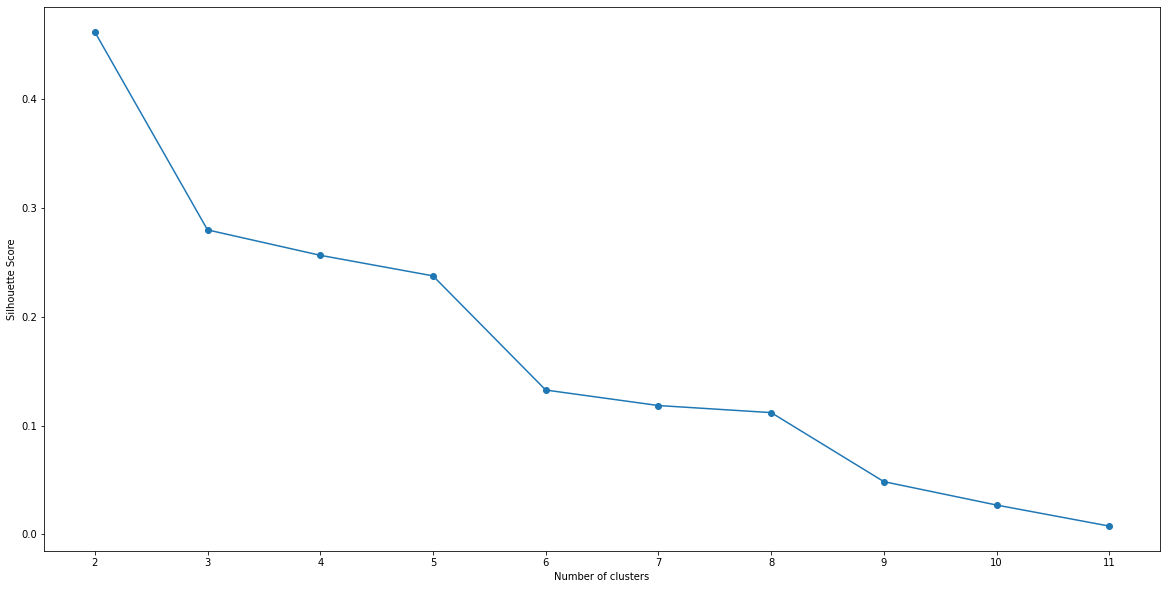

In [292]:
plot(max_range, scores, "Number of clusters", "Silhouette Score")

The graph has it´s maximum point at n = 2, so 2 is the best number of clusters. But since it´s a bit too low for proper clustering, I´ll go with 3.

In [293]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(berlin_clustered)
kmeans.labels_[0:10]

array([1, 1, 2, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

In [294]:
# dataframe with the clusters and top 10 venues of each borough
berlin2.rename(columns={'Name':'Neighborhood'}, inplace=True)
berlin2.head()

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = berlin2

berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index("Neighborhood"), on = "Neighborhood")

berlin_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,1,Café,Italian Restaurant,Bus Stop,Plaza,Hotel,Pizza Place,Tennis Court,German Restaurant,Gas Station,Ice Cream Shop
1,Friedrichshain-Kreuzberg,52.501115,13.444285,1,Bar,Café,Ice Cream Shop,Bakery,Hotel,Nightclub,Coffee Shop,Gym / Fitness Center,Hostel,Vietnamese Restaurant
2,Lichtenberg,48.921296,7.481227,2,Hostel,Historic Site,Wine Shop,Doner Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Escape Room,Dumpling Restaurant
3,Marzahn-Hellersdorf,52.522523,13.587663,0,Supermarket,Drugstore,Plaza,Trail,Shopping Mall,Bus Stop,Lake,Deli / Bodega,Cupcake Shop,Falafel Restaurant
4,Mitte,52.517885,13.404060,1,Hotel,Plaza,History Museum,Coffee Shop,Café,Art Gallery,Museum,Restaurant,Ice Cream Shop,Clothing Store
5,Neukölln,52.481150,13.435350,1,Bar,Coffee Shop,Café,Cocktail Bar,Italian Restaurant,German Restaurant,Indie Movie Theater,Bistro,Wine Shop,Nightclub
6,Pankow,52.597917,13.435316,0,Tram Station,Supermarket,Cooking School,Asian Restaurant,Bus Stop,Light Rail Station,Wine Shop,Drugstore,Farmers Market,Falafel Restaurant
7,Reinickendorf,52.604763,13.295287,1,Zoo Exhibit,Bakery,Ice Cream Shop,Gym,Italian Restaurant,Gastropub,Liquor Store,Nature Preserve,Clothing Store,Sports Bar
8,Spandau,52.535788,13.197792,1,Fast Food Restaurant,Clothing Store,Bakery,Drugstore,Hotel,Italian Restaurant,Park,Mobile Phone Shop,Pizza Place,Ice Cream Shop
9,Steglitz-Zehlendorf,52.429205,13.229974,1,Italian Restaurant,Bus Stop,History Museum,Café,Liquor Store,Sports Club,Light Rail Station,Steakhouse,Supermarket,Bar


In [295]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# use folium to visualize the clusters we´ve created
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], 
                                  berlin_merged['Neighborhood'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine each cluster

In [296]:
# shown as red dots on the map
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0]


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Marzahn-Hellersdorf,52.522523,13.587663,0,Supermarket,Drugstore,Plaza,Trail,Shopping Mall,Bus Stop,Lake,Deli / Bodega,Cupcake Shop,Falafel Restaurant
6,Pankow,52.597917,13.435316,0,Tram Station,Supermarket,Cooking School,Asian Restaurant,Bus Stop,Light Rail Station,Wine Shop,Drugstore,Farmers Market,Falafel Restaurant


The majority of the most common venues in this cluster aren´t related to gastronomy. In fact, in those boroughs most people use traffic stops or visit supermarkets.

In [299]:
#shown as purple dots on the map

berlin_merged.loc[berlin_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,1,Café,Italian Restaurant,Bus Stop,Plaza,Hotel,Pizza Place,Tennis Court,German Restaurant,Gas Station,Ice Cream Shop
1,Friedrichshain-Kreuzberg,52.501115,13.444285,1,Bar,Café,Ice Cream Shop,Bakery,Hotel,Nightclub,Coffee Shop,Gym / Fitness Center,Hostel,Vietnamese Restaurant
4,Mitte,52.517885,13.404060,1,Hotel,Plaza,History Museum,Coffee Shop,Café,Art Gallery,Museum,Restaurant,Ice Cream Shop,Clothing Store
5,Neukölln,52.481150,13.435350,1,Bar,Coffee Shop,Café,Cocktail Bar,Italian Restaurant,German Restaurant,Indie Movie Theater,Bistro,Wine Shop,Nightclub
7,Reinickendorf,52.604763,13.295287,1,Zoo Exhibit,Bakery,Ice Cream Shop,Gym,Italian Restaurant,Gastropub,Liquor Store,Nature Preserve,Clothing Store,Sports Bar
8,Spandau,52.535788,13.197792,1,Fast Food Restaurant,Clothing Store,Bakery,Drugstore,Hotel,Italian Restaurant,Park,Mobile Phone Shop,Pizza Place,Ice Cream Shop
9,Steglitz-Zehlendorf,52.429205,13.229974,1,Italian Restaurant,Bus Stop,History Museum,Café,Liquor Store,Sports Club,Light Rail Station,Steakhouse,Supermarket,Bar
10,Tempelhof-Schöneberg,52.440603,13.373703,1,Bus Stop,Supermarket,Bakery,Metro Station,Steakhouse,German Restaurant,Beer Bar,Farmers Market,Brewery,Food & Drink Shop
11,Treptow-Köpenick,52.417893,13.600185,1,Gastropub,River,Plaza,Tram Station,Massage Studio,Beach,Lake,Deli / Bodega,Donut Shop,Falafel Restaurant


This second cluster seems to be the most appropriate one to open up a restaurant in, as several neighborhoods contain restaurants in the top 5 most common venues.
Those neighborhoods are Charlottenburg-Wilmersdorf, Friedrichshain-Kreuzberg, Neukölln and Steglitz-Zehlendorf for example.

In [298]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Lichtenberg,48.921296,7.481227,2,Hostel,Historic Site,Wine Shop,Doner Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Escape Room,Dumpling Restaurant


This third cluster contains a few restaurants in the top 10 most common venues, but a hostel and fast food type of restaurants are dominating

# Conclusion
For future research on this topic a different way of determining the number of clusters should get tested. 
Perhaps two and three different clusters are not enough, as the biggest cluster still showed differences in itself
Nevertheless, future restaurant owners in Berlin might want to avoid Lichtenberg, Pankow and Marzahn-Hellersdorf, as those neighborhoods are heavily contested by supermarkets or used only as traffic stops to move quickly away